# Amazon Sales Data Review: Exmaining the effects of an item's discount percentage on the review star rating
## Introduction
Sales is a fickle industry. The price an item is sold at, the amount of units sold, the specific color of the item sold, and more all depend on a variety of different metrics. One of these such metrics is review rating. The overall rating of an item can influence a consumer's decision to purchase an item, whether it's a comparison between two similar items or whether they need that specific item at all. Review scores are so important that in the restaurant business many owners when first starting out will actively reply to reviews left on rating websites such as Google or Yelp to apologize, thank, or sometimes contest a review left by a consumer because it can be vital to the success of building a reputation. With this in mind, I came across sales data scraped from Amazon.com's India locale to answer how an item's star rating is affected by the discount percentage of said item. This report aims to identify whether a causal relationship exists between star rating and discount percentage, examine the correlation between star rating and discount percentage accounting for the item category, review counts, and respective prices, and check for potential dependencies amongst review counts and item prices (discounted and actual). Initial assumptions and intuition after a cursory review of the data can lead us to believe that the larger the discount the potentially less favorable the star rating when accounting for review count, price difference, and the item category type.

---
## Data
The data being analyzed is the Amazon Sales dataset taken from Kaggle.com. The dataset contains information scraped from India's Amazon.com marketplace in January of 2023 with 1465 total observations and each observation being the record of an item listed for sale. The dataset includes the following key variables examined:
- `category` - The category(s) that each particular product falls under. Categories fall under three major buckets, electronics, computers, and home/kitchen 
- `discounted_price` - The discounted price of the product, if a discount is being offered. Currency is Indian Rupee, renamed to `dcntprice`
- `actual_price` - The non-discounted price of the product. Currency is Indian Rupee, renamed to `actprice`
- `discount_percentage` - The percent the listed product was discounted for, if a discount was available. Selected as the **explanatory variable**, renamed to `dcntpct`. Percentages listed were divided by 100 to turn them into decimals between 0 and 1
- `rating` - The average star rating of each product from 1 to 5. Selected as the **dependent variable**, renamed to `stars`
- `rating_count` - The total number of reviews for each product available, renamed to `reviewcnt`

The following dummy variables were created from the dataset for further analysis:
- `computers` - Denotes a product that falls under the Computers category with a 1, 0 if not
- `electronics` - Denotes a product within the Electronics category with a 1, 0 if not

The following variables were calculated:
- `raw_dcnt` - Calculation of the price difference between the actual price and discounted price of a product
- `ln_reviewcnt` - The natural log of the `rating_count` column due to high variance of reviews per product
- `ln_raw_dcnt` - The natural log of the `raw_dcnt` variable due to high variance of price differences. Since the ln(0) is undefined, products that were not discounted were inputted as 0

Null values were examined in the dataset. There was 1 null value within `stars` and 2 within `reviewcnt`. For the purposes of this review, it could not be calculated what the null value for `stars` could represent so the value was dropped from the dataset. For `reviewcnt`, the review numbers were inputted as the mean value of reviews for the data, 18296 (rounded up) to not skew the data. A descriptive table can be seen in **Appendix A** of the numeric variables within the dataset.

---
## Models
For this study I constructed multiple models for review of the data to test the hypothesis of star ratings being positively correlated with discount percentages increasing. Each model constructed is a linear regression with OLS using `stars` as the dependent variable and `dcntpct` as the explanatory variable. All regressions are performed with a covariance type of HC1 for a heteroskedasticity and robustness check. Regression results for all models discussed can be seen in **Appendices C1 and C2**.

### Model 1 - Star rating on discount percentage
$stars = \beta_0 + \beta_1dcntpct$

From the results, an intercept of 4.197 and a coefficient of -.210 are seen, both statistically significant at p<.01 suggesting that the mean star rating when the discount percentage is 0 is 4.197 out of 5 and that for a 1% increase in the discount percentage it can be expected that the star rating will drop by .21 stars from the previous discount percentage. Two scatterplots were made using Seaborn to help illustrate this relationship. **Appendix B1** shows the scatterplot with the linear regression line through the data and **Appendix B2** shows the same plot but with a Loess line. The Loess line approximates the linear regression line however at the upper end of the data it curves up. However, for the vast majority of the data points available the slope of the Loess line is immaterially different from the slope of the line in **Appendix B1** and therefore a linear approximation of the relationship can be assumed.

### Model 2 - Adding ln(Review Count) as a control
$stars = \beta_0 + \beta_1dcntpct + \beta_2ln(Review Count)$

The results are $\beta_0$ of 3.92, $\beta_1$ of -.178, and $\beta_2$ of .032, all significant at p<.01. This implies that when controlling for ln(Review Count) a 1% increase in discount percentage we can expect star rating to decrease by .178 and that for a 1% increase in review counts we can expect star rating to increase by .032.

### Model 3 - Adding Computers dummy variable as an additional control
$stars = \beta_0 + \beta_1dcntpct + \beta_2ln(Review Count) + \beta_3computers$

From these results $\beta_1$ decreases to -.220, indicating that when accounting for computer products a 1% increase in discount percentage more negatively impacts star rating. $\beta_3$ is .094 indicating that the expected star rating for a computer product is on average .094 higher than products in other categories. All values are significant at p<.01.

### Model 4 - Replacing Computers with Electronics dummy variable
$stars = \beta_0 + \beta_1dcntpct + \beta_2ln(Review Count) + \beta_3electronics$

Interestingly, $\beta_1$ increases to -.169 indicating that, while an increase to discount percentage still has a negative impact, it's less so when accounting for electronics instead of computer products specifically, significant at p<.01. $\beta_3$ is -.038 which is interpreted as electronics having a .038 lower star rating than other products comparatively, however this is significant at p<.05 instead of p<.01 meaning we have less confidence in this result being the true value.

### Model 5 - Adding both dummy variables to compare against Home/Kitchen goods
$stars = \beta_0 + \beta_1dcntpct + \beta_2ln(Review Count) + \beta_4computers + \beta_5electronics$

$\beta_1$ decreases again to -.230 when accounting for all item categories. The coefficients on Computers (1.06) and Electronics (.020) are both higher when compared to home/kitchen products. The Electronics coefficient is not statistically significant so we cannot take confidence in this.

### Model 6 - Adding in ln(Price Difference) as a control
$stars = \beta_0 + \beta_1dcntpct + \beta_2ln(Review Count) + \beta_4computers + \beta_5electronics + \beta_6ln(Price Difference)$

$\beta_1$ decreases further to -.274 (p<.01) and $\beta_6$ is at .011 significant at p<.05. The estimated coefficient for ln(Price Difference) indicates a slight increase to star rating for a 1% increase in price differences in items on sale of .011 stars however this is negligible.

### Model 7 - Using ln(Price Difference) as lone control
$stars = \beta_0 + \beta_1dcntpct + \beta_2ln(Price Difference)$

$\beta_1$ here is -.230 (p<.01) which is equivalent to model 5 and $\beta_2$ is .005 but not statistically significant. It can be inferred that the price difference does not have a significant impact on star rating on it's own.

### Model 8 - Adding an interaction between ln(Price Difference) and ln(Review Count)
$stars = \beta_0 + \beta_1dcntpct + \beta_2ln(Review Count) + \beta_3ln(Price Difference) + \beta_4ln(Price Difference)*ln(Review Count)$

The resulting coefficients are as follows: $\beta_0$ 3.758, $\beta_1$ -.187, $\beta_2$ .049, $\beta_3$ .025, and $\beta_4$ -.003 with betas 0, 1, and 2 being significant at p<.01 and betas 3 and 4 not being statistically significant. It's inferred from this that the interaction term does not have a significant impact on the model.

---
## Summation of Findings
Amongst all models the analysis the of increases to discount percentage on star ratings were consistently negative. This can be seen as intuitive in that products that have a higher star rating do not necessarily require a discount in order to sell whereas a products with lower star ratings may need a discount to sell at a comparably. Interestingly, model 2 shows that when controlling solely for ln(Review Count) the impact of discount percentage on star rating isn't as strong. An interpretation of this could be that products' star ratings amongst similar review counts are not as impacted by increasing discount percentages compared to items that have larger varying review counts. A similar coefficient can be found in model 4 when accounting for products within the Computer category. Somewhat conversely, when accounting for Electronics rather than Computer products the coefficient *is* comparable to model 1's $\beta_1$ coefficient. It could be said that model 2 is moreso true for items in certain cateogries/types than others. When accounting for all control variables, the $\beta_1$ coefficient is the most negative out of any of the models at -.274 (p<.01). This implies that controlling for item categories and the change in raw price differences and not simply discount percentages along with the natural log of review counts that a 1% increase to discount percentage is more impactful negatively to star rating than when not controlling for other variables at all. The adjusted $r^2$ value for this model is the highest evidenced from the results at .094, however this is still a low value overall and indicates that the model is capturing an estimated 9.4% of the variance. When testing for an interaction between the natural logs of price differences and review count it was found that there was not a meaningful impact of these two variables on star rating or discount percentage as the results did not have statistical significance and coefficients fairly close to 0. When stepping back and checking for external validity, the data used for this analysis and the results from the models can be compared favorably with other markets and sales types. The products within the dataset are items that would be sold within many different markets globally as electronics and computers are similar if not exactly the same globally. Home/kitchen goods may vary more however a pot or pan in one country is comparable to a pot or pan in another country as well.

---
## Conclusion
From the findings, it can be concluded that star rating is in fact negatively impacted by the discount percentage of the product, though not significantly so. When controlling for all types of variables, the negative impact remains, with varying strength. It cannot be said, however that the relationship is a causal one. The models used do show that there is a consistent negative correlation between star rating and discount percentages but more data and models would be needed in order to determine whether this is a causal relationship or not. In general, however, it can be recommended that if a seller has a product that they would like to sell, it would be wise for them to review their current star rating and set a discount percentage accordingly.

---

### Data Surveying and Cleaning

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

# Loading data from github
df = pd.read_csv('https://raw.githubusercontent.com/nxfern/DA2_Final_Project/main/amazon.csv')
print(df.shape)
df.head(3)

(1465, 16)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [2]:
# Dropping unneded columns
df.drop(columns=['product_id', 'user_id', 'user_name', 'review_id', 'img_link', 'product_link'], inplace=True)

# Checking dtypes of df
df.dtypes

product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
review_title           object
review_content         object
dtype: object

In [3]:
# Removing special characters from numeric categories and converting to numeric
df['discounted_price'] = [x.replace('₹','').replace(',','') for x in df['discounted_price']]
df['actual_price'] = [x.replace('₹','').replace(',','') for x in df['actual_price']]
df['discount_percentage'] = [x.replace('%','') for x in df['discount_percentage']]
df['rating'] = pd.to_numeric([x.replace('|','') for x in df['rating']], errors='coerce')
df['rating_count'] = [x.replace(',','') if type(x)!=float else x for x in df['rating_count']]

# Changing numerical categories to 
df = df.astype({'discounted_price':'float',
                'actual_price':'float',
                'discount_percentage':'float',
                'rating':'float',
                'rating_count':'float'})

# Checking for null values
df.isnull().sum()

product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
review_title           0
review_content         0
dtype: int64

In [4]:
# Examining contents of null values of both `rating` and `rating_count` columns
df.loc[(df['rating'].isnull()==True) | (df['rating_count'].isnull()==True)]

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content
282,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80.0,3.0,NaN,USB C to C Cable: This cable has type C connec...,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...
324,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,75.0,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,Awesome Product,Quick delivery.Awesome ProductPacking was good...
1279,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16.0,NaN,992.0,No Installation is provided for this product|1...,"Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though..."


In [5]:
# Checking descriptive stats for rating_count
df['rating_count'].describe()

count      1463.000000
mean      18295.541353
std       42753.864952
min           2.000000
25%        1186.000000
50%        5179.000000
75%       17336.500000
max      426973.000000
Name: rating_count, dtype: float64

In [6]:
# Dropping the `rating` null value because it cannot be determined what value to attribute
df2 = df.loc[df['rating'].isnull() == False]

# Replacing `rating_count` null values with 1
df2['rating_count'].fillna(18296, inplace=True)

# Converting `rating_count` to type int which wasn't possible before
df2 = df2.astype({'rating_count':'int'})

# Dividing `discount_percentage` column by 100 to display percentage as values between 0 and 1
df2['discount_percentage'] = df['discount_percentage'].div(100)

# Deleting first dataframe
del df

# Renaming columns in dataframe for easier reading/interpreting
df2.rename(columns={'rating':'stars', 'discounted_price':'dcntprice', 'actual_price':'actprice',
                    'rating_count':'reviewcnt', 'discount_percentage':'dcntpct'}, inplace=True)

### Creation of Variables for Analysis and Regression Models

In [7]:
# Categories fall into three major types within the data - Computers, Electronics, and Kitchen goods. Creating dummy variables for Computers and Electronics
df2['computers'] = df2['category'].str.contains('Computer', na=False).astype(int)
df2['electronics'] = df2['category'].str.contains('Electronic', na=False).astype(int)

# Creating new column `raw_dcnt' that takes the difference between `actprice` and `dcntprice'
df2['raw_dcnt'] = df2['actprice'] - df2['dcntprice']
                      
# Creating ln of `reviewcnt` and 'raw_dcnt'
df2["ln_reviewcnt"] = np.log(df2["reviewcnt"])
df2['ln_raw_dcnt'] = [np.log(x) if x != 0 else x for x in df2['raw_dcnt']] # Returns 0 when no discount present

# Renaming columns to make them easier to read for descriptive table
descriptive_stats = df2.describe().round(2)
descriptive_stats.rename(columns={'ln_reviewcnt':'ln(reviewcnt)', 'ln_raw_dcnt':'ln(raw_dcnt)'}, inplace=True)

# Model 1, simple linear regression of `rating` on `discount_percentage`
reg1 = smf.ols(formula="stars ~ dcntpct", data=df2).fit(cov_type="HC1")

# Model 2 adding ln(reviewcnt)
reg2 = smf.ols(formula='stars ~ dcntpct + ln_reviewcnt', data=df2).fit(cov_type='HC1')

# Model 3, adding binary `computers` variable
reg3 = smf.ols(formula="stars ~ dcntpct + ln_reviewcnt + computers", data=df2).fit(cov_type='HC1')

# Model 4, adding binary `electronics` variable, removing `computers`
reg4 = smf.ols(formula="stars ~ dcntpct + ln_reviewcnt + electronics", data=df2).fit(cov_type='HC1')

# Model 5, adding both category binaries
reg5 = smf.ols(formula="stars ~ dcntpct + ln_reviewcnt + computers + electronics", data=df2).fit(cov_type='HC1')

# Model 6, adding ln(raw_dcnt)
reg6 = smf.ols(formula="stars ~ dcntpct + ln_reviewcnt + computers + electronics + ln_raw_dcnt", data=df2).fit(cov_type='HC1')

# Model 7, checking stars by dcntpct and ln_raw_dcnt for comparison with interactions
reg7 = smf.ols(formula='stars ~ dcntpct + ln_raw_dcnt', data=df2).fit(cov_type='HC1')

# Model 8, adding an interaction between ln(reviewcnt) and ln(dcntprice) to test to see if there's some type of dependency
reg8 = smf.ols(formula='stars ~ dcntpct + ln_reviewcnt + ln_raw_dcnt + ln_raw_dcnt*ln_reviewcnt', data=df2).fit(cov_type='HC1')

### Appendix A - Dataframe Descriptive Table

In [8]:
# Descriptive table of df2
descriptive_stats

,dcntprice,actprice,dcntpct,stars,reviewcnt,computers,electronics,raw_dcnt,ln(reviewcnt),ln(raw_dcnt)
count,1464.00,1464.00,1464.00,1464.00,1464.00,1464.00,1464.00,1464.00,1464.00,1464.00
mean,3126.01,5447.00,0.48,4.10,18307.36,0.31,0.36,2320.99,8.30,6.60
std,6946.63,10878.27,0.22,0.29,42736.85,0.46,0.48,4605.77,2.04,1.83
min,39.00,39.00,0.00,2.00,2.00,0.00,0.00,0.00,0.69,0.00
25%,323.75,800.00,0.32,4.00,1192.50,0.00,0.00,370.75,7.08,5.92
50%,799.00,1650.00,0.50,4.10,5187.00,0.00,0.00,800.00,8.55,6.68
75%,1999.00,4303.75,0.63,4.30,17398.75,1.00,1.00,1955.00,9.76,7.58
max,77990.00,139900.00,0.94,5.00,426973.00,1.00,1.00,61910.00,12.96,11.03


### Appendix B1 - Scatterplot with Simple Regression Line

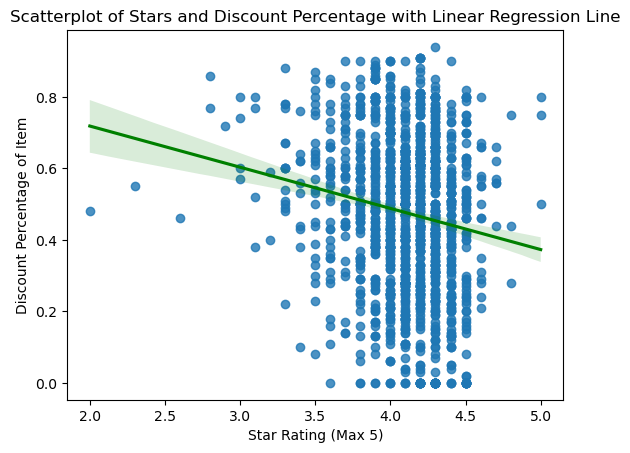

In [9]:
# Creating scatterplot of stars and discount percentage with regression line
sns.regplot(x=df2['stars'], y=df2['dcntpct'], line_kws={'color':'green'})

# adding titles and labels
plt.title('Scatterplot of Stars and Discount Percentage with Linear Regression Line')
plt.xlabel('Star Rating (Max 5)')
plt.ylabel('Discount Percentage of Item')

# Display plot
plt.show()

### Appendix B2 - Scatterplot with Loess Line

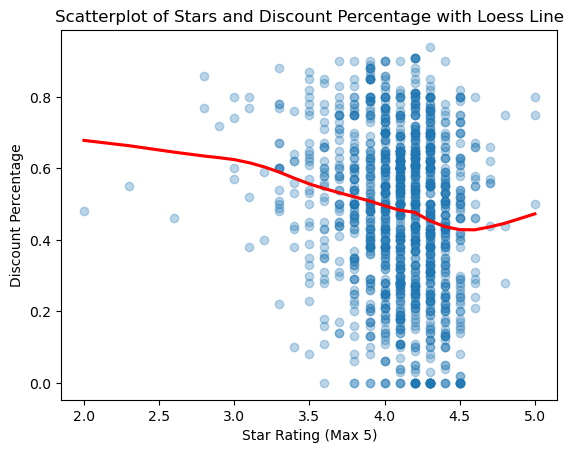

In [10]:
# Creating a scatterplot with a loess line
sns.regplot(x="stars", y="dcntpct", data=df2, lowess=True, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})

# Set plot labels and title
plt.xlabel("Star Rating (Max 5)")
plt.ylabel("Discount Percentage")
plt.title("Scatterplot of Stars and Discount Percentage with Loess Line")

# Show the plot
plt.show()

### Appendix C1 - Regression results of first 6 Models compared

In [11]:
# Displaying results of regressions using Stargazer Models 1-6
stargazer = Stargazer([reg1, reg2, reg3, reg4, reg5, reg6])
stargazer.covariate_order(["dcntpct", "ln_reviewcnt", "computers", "electronics", "ln_raw_dcnt", "Intercept"])
stargazer.rename_covariates({"Intercept": "Constant", 'dcntpct':'Discount Percentage','ln_reviewcnt': 'ln(Review Count)',
                             'computers':'Item Category: Computers', 'electronics':'Item Category: Electronics',
                             'ln_raw_dcnt': 'ln(Price Difference)'})
stargazer

### Appendix C2 - Regression results of Models 2, 7 and 8

In [12]:
# Displaying stargazer results Models 2, 7 and 8
stargazer = Stargazer([reg2, reg7, reg8])
stargazer.covariate_order(['dcntpct', 'ln_reviewcnt', 'ln_raw_dcnt',
                           'ln_raw_dcnt:ln_reviewcnt', 'Intercept'])
stargazer.rename_covariates({'dcntpct':'Discount Percentage', 'ln_reviewcnt': 'ln(Review Count)',
                             'ln_raw_dcnt:ln_reviewcnt':'ln(Price Difference) x ln(Review Count)',
                             'Intercept':'Constant'})
stargazer